Monroe County Housing Data - Sale Price Prediction Project
-----------------------------------------------------------------------
Author: Chris Zimmerman
-----------------------------------------------------------------------
Python project analyzing Monroe County Home sales over the last 3 year period. CSV files of home sale data pulled from Monroe County Real Property Portal at https://www.monroecounty.gov/etc/rp/search2.php. Utilizes the Pandas, Matplotlib, and Numpy libraries to analyze and clean the data.

The goal of the project is to utilize a machine learning library (scikit-learn) to create a model to predict home sale price based on the details and specifications of the home with at least 70% accuracy. After meeting this benchmark the model will be implemented into a web interface using the Flask framework so a user can receive a prediction for the sale price of their home. Project is in progress.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import mpl_toolkits 
%matplotlib inline 
import sklearn

In [2]:
data = pd.read_csv('/Users/Chris/Desktop/PyCharmProjects/mc-home-sales/merged.csv')
data.head()

,Street #,Street Name,City,Zip Code,Parcel ID,SWIS Code,Municipality,School Code,School Name,Property Class Code,...,Year Built,# Bedrooms,# Bathrooms,# Half Bathrooms,# Fireplaces,# Kitchens,Total Assessed Value,Land Assessed Value,Sale Price,Sale Date
0,237,Clark St,Brockport,14420,068.11-4-1,265201,Brockport,265201,Brockport Central,NaN,...,1960.0,5.0,3.0,0.0,0.0,1.0,119500,38300,155000,7/1/19
1,28,Goldenhill Ln,Brockport,14420,083.01-1-64,265289,Sweden,265201,Brockport Central,NaN,...,2015.0,4.0,2.0,1.0,0.0,1.0,178500,33900,199990,7/1/19
2,1,Whitney Road West,Penfield,14526,139.14-1-1,264489,Perinton,264201,Penfield Central 1,NaN,...,1929.0,3.0,1.0,0.0,1.0,1.0,205300,33600,230000,6/28/19
3,1,Brooktree Dr,Penfield,14526,139.14-1-36,264489,Perinton,264401,Fairport Central,NaN,...,1965.0,3.0,1.0,0.0,0.0,1.0,132600,33700,171000,6/28/19
4,5,Kerry Hl,Fairport,14450,153.02-6-68,264489,Perinton,264401,Fairport Central,NaN,...,1990.0,4.0,2.0,1.0,1.0,1.0,298100,70500,285000,6/28/19


In [3]:
# Drop unneccesary columns and describe the initial data

drop_cols = ['Street #', 'Street Name', 'Parcel ID', 'SWIS Code', 'Property Class Code',
             'School Code', 'Exterior Wall Type', 'Zip Code']

data.drop(columns=drop_cols, inplace=True) 
data.describe()

,Floor Area,Acres,Year Built,# Bedrooms,# Bathrooms,# Half Bathrooms,# Fireplaces,# Kitchens,Total Assessed Value,Land Assessed Value,Sale Price
count,33658.000000,33664.000000,33658.000000,33658.000000,33658.000000,33658.000000,33658.000000,33658.000000,3.366400e+04,33664.000000,3.366400e+04
mean,1761.630400,0.655693,1966.342831,3.171698,1.613673,0.566225,0.630519,1.029889,1.721240e+05,35314.383525,1.357986e+05
std,660.886933,2.912915,30.387486,0.796208,0.667756,0.521427,0.611347,0.181598,1.011357e+05,21007.432204,1.900854e+05
min,0.000000,0.000000,1800.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000e+04,0.000000,0.000000e+00
25%,1320.000000,0.120000,1952.000000,3.000000,1.000000,0.000000,0.000000,1.000000,1.125000e+05,24500.000000,4.550000e+04
50%,1640.000000,0.280000,1966.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.436000e+05,31000.000000,1.250000e+05
75%,2052.000000,0.460000,1987.000000,4.000000,2.000000,1.000000,1.000000,1.000000,2.028000e+05,40900.000000,1.869250e+05
max,19350.000000,118.700000,2019.000000,10.000000,9.000000,5.000000,10.000000,4.000000,2.745500e+06,717120.000000,2.493292e+07


In [4]:
print(data.dtypes)

City                     object
Municipality             object
School Name              object
Property Class Name      object
Building Style           object
Floor Area              float64
Acres                   float64
Year Built              float64
# Bedrooms              float64
# Bathrooms             float64
# Half Bathrooms        float64
# Fireplaces            float64
# Kitchens              float64
Total Assessed Value      int64
Land Assessed Value       int64
Sale Price                int64
Sale Date                object
dtype: object


In [5]:
# Print out the number of homes and the number of features in the dataframe

num_homes = data.shape[0]
num_features = data.shape[1] - 1

print(f"Total number of homes: {num_homes}")
print(f"Total number of features: {num_features}")

Total number of homes: 33664
Total number of features: 16


In [6]:
# Remove any outliers where the sale price is less than $10000 as they are not representative of true home values

data = data.drop(data[data['Sale Price'] < 10000].index)

In [7]:
# Note the after these homes are remove above the total number of homes decreases from 33,664 to 25,964

num_homes = data.shape[0]
num_features = data.shape[1] - 1
print(f"Total number of homes: {num_homes}")
print(f"Total number of features: {num_features}")

Total number of homes: 25964
Total number of features: 16


In [8]:
# Remove any homes that are not of the type single family home (where 'Property Class Name' != '1 Family Res')

data = data.drop(data[data['Property Class Name'] != '1 Family Res'].index)

In [9]:
data.drop(columns='Property Class Name', inplace=True)

In [10]:
# Note the after all but '1 Family Res' are removed above the total number of homes decreases from 25,964 to 25,336

num_homes = data.shape[0]
num_features = data.shape[1] - 1

print(f"Total number of homes: {num_homes}")
print(f"Total number of features: {num_features}")

Total number of homes: 25336
Total number of features: 15


In [11]:
data.describe() # Describe the data after the inconsistent data removed

# Note the increase in mean sale price after cleaning the data from $135,798.60 to $175,598.80

,Floor Area,Acres,Year Built,# Bedrooms,# Bathrooms,# Half Bathrooms,# Fireplaces,# Kitchens,Total Assessed Value,Land Assessed Value,Sale Price
count,25333.000000,25336.000000,25333.000000,25333.000000,25333.000000,25333.000000,25333.000000,25333.000000,2.533600e+04,25336.000000,2.533600e+04
mean,1743.973276,0.466697,1967.722970,3.151265,1.603482,0.578179,0.633758,1.008961,1.729178e+05,34930.794798,1.755988e+05
std,632.864432,1.374307,29.494945,0.769410,0.656202,0.519037,0.604147,0.098337,9.961631e+04,19636.449695,2.004579e+05
min,0.000000,0.000000,1800.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000e+04,0.000000,1.000000e+04
25%,1312.000000,0.110000,1952.000000,3.000000,1.000000,0.000000,0.000000,1.000000,1.125000e+05,24500.000000,1.100000e+05
50%,1626.000000,0.280000,1966.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.440000e+05,30900.000000,1.459000e+05
75%,2033.000000,0.460000,1988.000000,4.000000,2.000000,1.000000,1.000000,1.000000,2.060000e+05,40500.000000,2.149000e+05
max,12862.000000,92.070000,2019.000000,10.000000,6.000000,5.000000,10.000000,4.000000,1.875000e+06,331100.000000,2.493292e+07


In [12]:
data['Sale Date'] = data['Sale Date'].astype('datetime64[ns]') 

In [13]:
data['Building Style'] = data['Building Style'].astype('str') 

In [14]:
print(data.dtypes)

City                            object
Municipality                    object
School Name                     object
Building Style                  object
Floor Area                     float64
Acres                          float64
Year Built                     float64
# Bedrooms                     float64
# Bathrooms                    float64
# Half Bathrooms               float64
# Fireplaces                   float64
# Kitchens                     float64
Total Assessed Value             int64
Land Assessed Value              int64
Sale Price                       int64
Sale Date               datetime64[ns]
dtype: object


In [15]:
date = data.set_index('Sale Date').groupby(pd.Grouper(freq='M')).mean()

/Users/chris/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


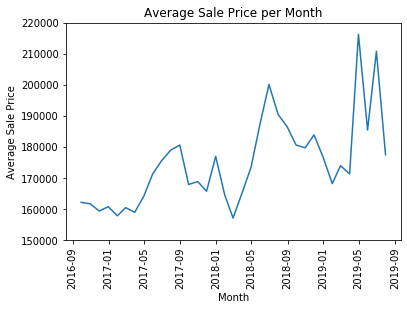

In [16]:
# Average Sale Price Per Month

fig, ax = plt.subplots()
ax.plot(date['Sale Price'], data=data)

plt.title('Average Sale Price per Month')
plt.xlabel('Month')
plt.xticks(rotation=90)
plt.ylabel('Average Sale Price')
plt.ylim(150000, 220000)
plt.show()

In [17]:
# Statistics for the dataset 'Sale Price' column

# Minimum price of the data
min_price = round(data['Sale Price'].min(), 2)

# Maximum price of the data
max_price = round(data['Sale Price'].max(), 2)

# Mean price of the data
mean_price = round(data['Sale Price'].mean(), 2)

# Median price of the data
med_price = round(data['Sale Price'].median(), 2)

# Standard deviation of prices of the data
std_price = round(data['Sale Price'].std(), 2)

# Show the calculated statistics
print(f'Statistics for Monroe County Home Sale Prices:\n')
print(f'Minimum price: ${min_price}') 
print(f'Maximum price: ${max_price}')
print(f'Mean price: ${mean_price}')
print(f'Median price ${med_price}')
print(f'Standard deviation of prices: ${std_price}')

Statistics for Monroe County Home Sale Prices:

Minimum price: $10000
Maximum price: $24932924
Mean price: $175598.85
Median price $145900.0
Standard deviation of prices: $200457.93


Text(0, 0.5, 'Count')

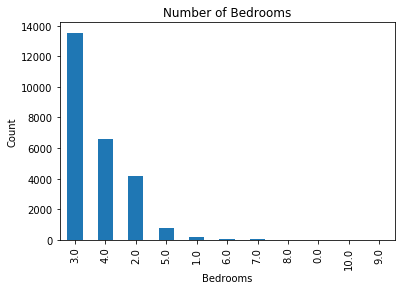

In [18]:
# Number of bedrooms amongst houses in the data

data['# Bedrooms'].value_counts().plot(kind='bar')
plt.title('Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')

Text(0, 0.5, 'Number of Houses')

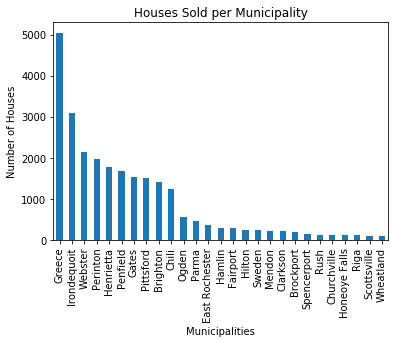

In [19]:
data['Municipality'].value_counts().plot(kind='bar')
plt.title('Houses Sold per Municipality')
plt.xlabel('Municipalities')
plt.ylabel('Number of Houses')

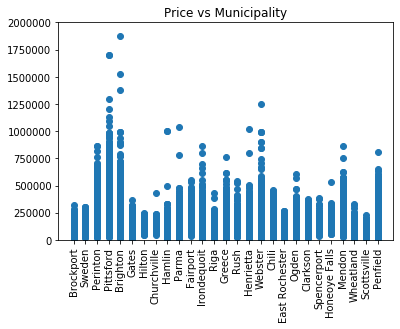

In [20]:
# Home Sale Price Per Municipality

plt.scatter(data['Municipality'], data['Sale Price'])
plt.title('Price vs Municipality')
plt.xticks(rotation=90)  # To rotate the municilapilty name to vertical text
plt.ylim(0,2000000)
plt.show()

Text(0, 0.5, 'Average Sale Price')

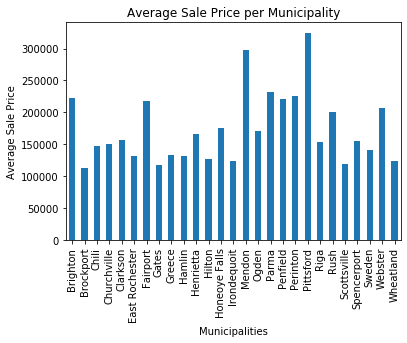

In [21]:
# Average Sale Price Per Municipality

data.groupby('Municipality')['Sale Price'].mean().plot(kind='bar')
plt.title('Average Sale Price per Municipality')
plt.xlabel('Municipalities')
plt.ylabel('Average Sale Price')


Text(0, 0.5, 'Average Sale Price')

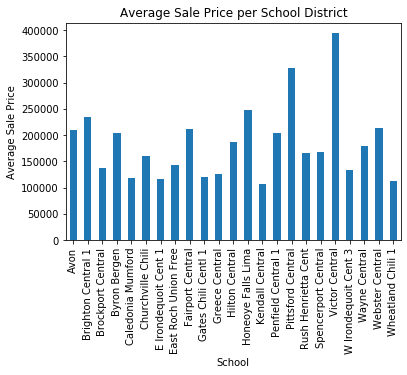

In [22]:
# Average Sale Price Per School

data.groupby('School Name')['Sale Price'].mean().plot(kind='bar')
plt.title('Average Sale Price per School District')
plt.xlabel('School')
plt.ylabel('Average Sale Price')

(0, 1000000)

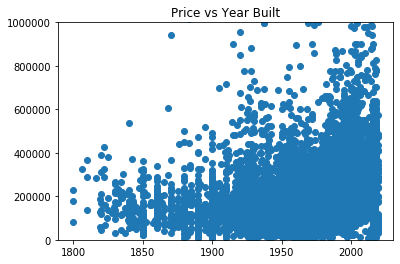

In [23]:
# Price vs. Year Built Graph

plt.scatter(data['Year Built'], data['Sale Price'])
plt.title('Price vs Year Built')
plt.ylim(0, 1000000)

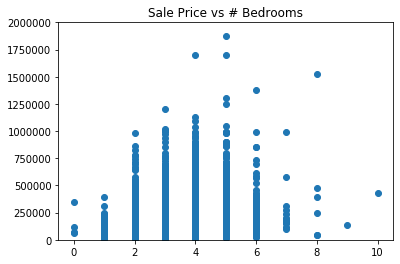

In [24]:
# Sale Price vs. Number of Bedrooms Graph

plt.scatter(data['# Bedrooms'], data['Sale Price'])
plt.title('Sale Price vs # Bedrooms')
plt.ylim(0,2000000)
plt.show()

(0, 2000000)

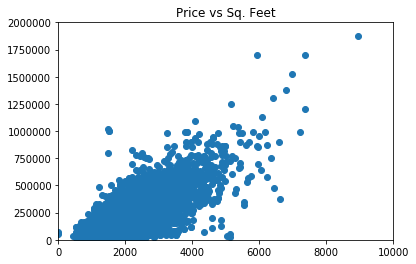

In [25]:
# Sale Price vs. Square Feet Graph

plt.scatter(data['Floor Area'], data['Sale Price'])
plt.title('Price vs Sq. Feet')
plt.xlim(0,10000)
plt.ylim(0,2000000)

# Floor area is very lineal in relation to the sale price

-------------------------------------------
Prepare the data for predictive modeling
-------------------------------------------

In [26]:
# Convert the categorical columns into numeric values

from sklearn import preprocessing

le = preprocessing.LabelEncoder()
conversion_cols =['Municipality', 'School Name'] 


# Use a dictionary to map the converted columns numbers to their prior categroical values
converted_cols = {}
for col in conversion_cols:
    data[col] = le.fit_transform(data[col])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    converted_cols[col]=le_name_mapping
print(converted_cols)



{'Municipality': {'Brighton': 0, 'Brockport': 1, 'Chili': 2, 'Churchville': 3, 'Clarkson': 4, 'East Rochester': 5, 'Fairport': 6, 'Gates': 7, 'Greece': 8, 'Hamlin': 9, 'Henrietta': 10, 'Hilton': 11, 'Honeoye Falls': 12, 'Irondequoit': 13, 'Mendon': 14, 'Ogden': 15, 'Parma': 16, 'Penfield': 17, 'Perinton': 18, 'Pittsford': 19, 'Riga': 20, 'Rush': 21, 'Scottsville': 22, 'Spencerport': 23, 'Sweden': 24, 'Webster': 25, 'Wheatland': 26}, 'School Name': {'Avon': 0, 'Brighton Central 1': 1, 'Brockport Central': 2, 'Byron Bergen': 3, 'Caledonia Mumford': 4, 'Churchville Chili': 5, 'E Irondequoit Cent 1': 6, 'East Roch Union Free': 7, 'Fairport Central': 8, 'Gates Chili Centl 1': 9, 'Greece Central': 10, 'Hilton Central': 11, 'Honeoye Falls Lima': 12, 'Kendall Central': 13, 'Penfield Central 1': 14, 'Pittsford Central': 15, 'Rush Henrietta Cent': 16, 'Spencerport Central': 17, 'Victor Central': 18, 'W Irondequoit Cent 3': 19, 'Wayne Central': 20, 'Webster Central': 21, 'Wheatland Chili 1': 22}}

In [27]:
data = data.dropna()

In [28]:
target = data['Sale Price']
data2 = data[['Year Built', 'Floor Area', 'Acres', 'Municipality', 'School Name', 
             '# Bedrooms', '# Bathrooms', '# Half Bathrooms']].copy() 

In [29]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(data2, target, test_size = 0.10, random_state =2)


-------------------------------------------
Modeling:
-------------------------------------------

--------------
Regression Models
-------------
Since this is a numerical prediction the choice for modeling should be a regression model.  The models do back this up with a 70.86% accuracy on the GBR model

--------------
Linear Regression 
-------------
Accuracy: 60.75%

In [30]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(x_train,y_train)

print(linreg.score(x_test,y_test))

0.602255917180527


----
Gradient Boosting Regressor
----
Accuracy: 70.68%

In [31]:
from sklearn import ensemble

gbr = ensemble.GradientBoostingRegressor()
gbr.fit(x_train, y_train)

print(gbr.score(x_test, y_test))

0.7066600996211326


In [32]:
y_pred = gbr.predict(x_test)
print('predicted response:', y_pred)

predicted response: [217794.87602727  94847.93137929 256755.34578993 ... 137247.84354234
 274294.2774258  211737.00974683]


In [33]:
# ['Year Built', 'Floor Area', 'Total Assessed Value', 'Acres', 'Municipality', 'School Name', 
#             '# Bedrooms', '# Bathrooms', '# Half Bathrooms']

x_new_input = np.array([1970, 1700, 1, 2, 3, 1, 1, 1]).reshape((1, -1))

y_new = gbr.predict(x_new_input)
print(y_new)

[130588.47117615]


----
Random Forrest Regressor
----
Accuracy: 66.95%

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [35]:
from sklearn.ensemble import RandomForestRegressor

rfreg = RandomForestRegressor(n_estimators=200, random_state=0)
rfreg .fit(x_train, y_train)
print(rfreg .score(x_test, y_test))

0.6695067054096344


----
Decision Tree Regressor
----
Accuracy: 37.64%

In [36]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)

print(dtr.score(x_test, y_test) * 100)

36.60592975979139


----
XGBoost Regressor
----
Accuracy: 70.398%

In [37]:
#import xgboost as xgb

import xgboost as xgb
xgbr = xgb.XGBRegressor()
xgbr.fit(x_train, y_train)

print(xgbr.score(x_test, y_test))

[15:25:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/chris/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


0.7039818607910546


----
Classifier Models
----
As expected, the classifier models are poor performing since this is a numerical prediction

----
Decision Tree Classifier
----
Accuracy: 1.89%

In [38]:
from sklearn import tree

dtclf = tree.DecisionTreeClassifier(max_depth=2, min_samples_leaf = 100 )
dtclf.fit(x_train, y_train)

print(dtclf.score(x_test, y_test))

0.018942383583267563


----
Random Forrest Classifier
----
Accuracy: 4.85%

In [39]:
from sklearn.ensemble import RandomForestClassifier

rfclf = RandomForestClassifier(n_estimators=20, random_state=0)
rfclf.fit(x_train, y_train)
rfclf.score(x_test, y_test)

0.04696132596685083

----
Naive-Bayes
----
Accuracy: 0.67%

In [40]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)
print(gnb.score(x_test, y_test))

0.006314127861089187


----
KNeighbors
----
Accuracy: 2.29%

In [41]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train, y_train)

print(neigh.score(x_test, y_test))

0.027624309392265192
